In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# here we have imported the neccesary library

In [2]:
calhouse = pd.read_csv('cleaned_california.csv')
calhouse.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
calhouse.head()
#displays the first 5 elements
# here we have the values of the cleaned data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Since we have to calucalte and predict the value of the house we will take the median_house_value as the y variable

In [4]:
# since we are going to do training as well as the testing of the data
# we need to import some more libraires
from sklearn.model_selection import train_test_split

x = calhouse.drop(['median_house_value'], axis=1)
y = calhouse['median_house_value']
# here we have made the x and y train dataset.
# we have dropped the y train which is the median house value which will intern will be the hosue cost


In [5]:
X_train , X_test , y_train , y_test = train_test_split(x , y ,test_size=0.2)
trained_data = X_train.join(y_train)
# using this we are going to x train and y train mechanism where we have taken the size of 0.2
trained_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7022,-117.99,33.92,27.0,5805.0,1152.0,3106.0,1144.0,4.0610,<1H OCEAN,222700.0
19040,-122.72,38.48,23.0,2296.0,356.0,902.0,334.0,6.0298,<1H OCEAN,289100.0
18098,-122.08,37.36,28.0,2181.0,284.0,728.0,238.0,8.2266,NEAR BAY,500001.0
10822,-117.91,33.73,26.0,2413.0,512.0,2867.0,509.0,4.7639,<1H OCEAN,179900.0
7992,-118.20,33.82,43.0,1758.0,347.0,954.0,312.0,5.2606,NEAR OCEAN,198900.0
...,...,...,...,...,...,...,...,...,...,...
17804,-121.97,37.31,21.0,7628.0,2166.0,3637.0,1749.0,3.6401,<1H OCEAN,267500.0
4056,-118.42,34.16,46.0,54.0,9.0,20.0,6.0,0.5360,<1H OCEAN,375000.0
12915,-121.18,38.67,42.0,2101.0,480.0,945.0,426.0,2.3333,INLAND,116000.0
6760,-118.12,34.08,49.0,1782.0,374.0,1010.0,367.0,3.1583,<1H OCEAN,268200.0


Here we have created a new train test and split column and made the median value.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

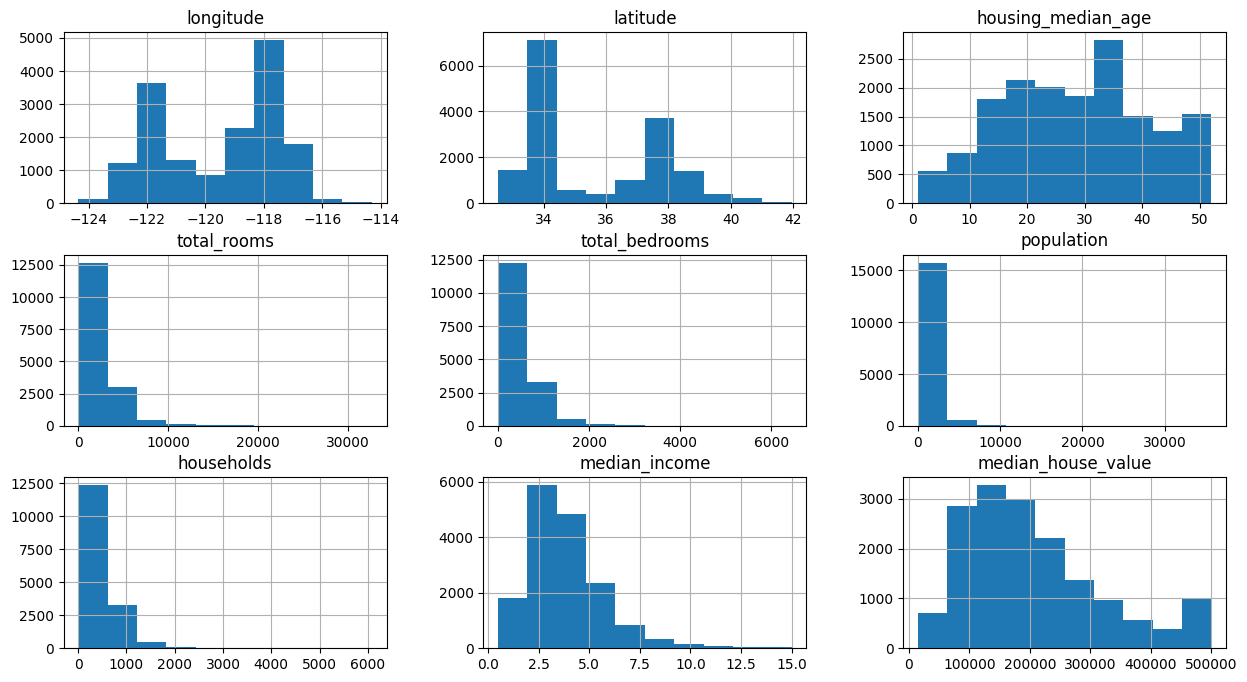

In [6]:
trained_data.hist(figsize=(15 , 8))
# Here we have made the figsize where each variable has been compared with the y trained variable

# Now that we have created a base model we are going to do some data Preprocessing


In [7]:
trained_data['total_rooms'] = np.log(trained_data['total_rooms'] +1)
trained_data['total_bedrooms'] = np.log(trained_data['total_bedrooms'] +1)
trained_data['population'] = np.log(trained_data['population'] +1)
trained_data['households'] = np.log(trained_data['households'] +1)
# this helps the transformation to normalize the skewed data.It makes it more suitbale for making linear models.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

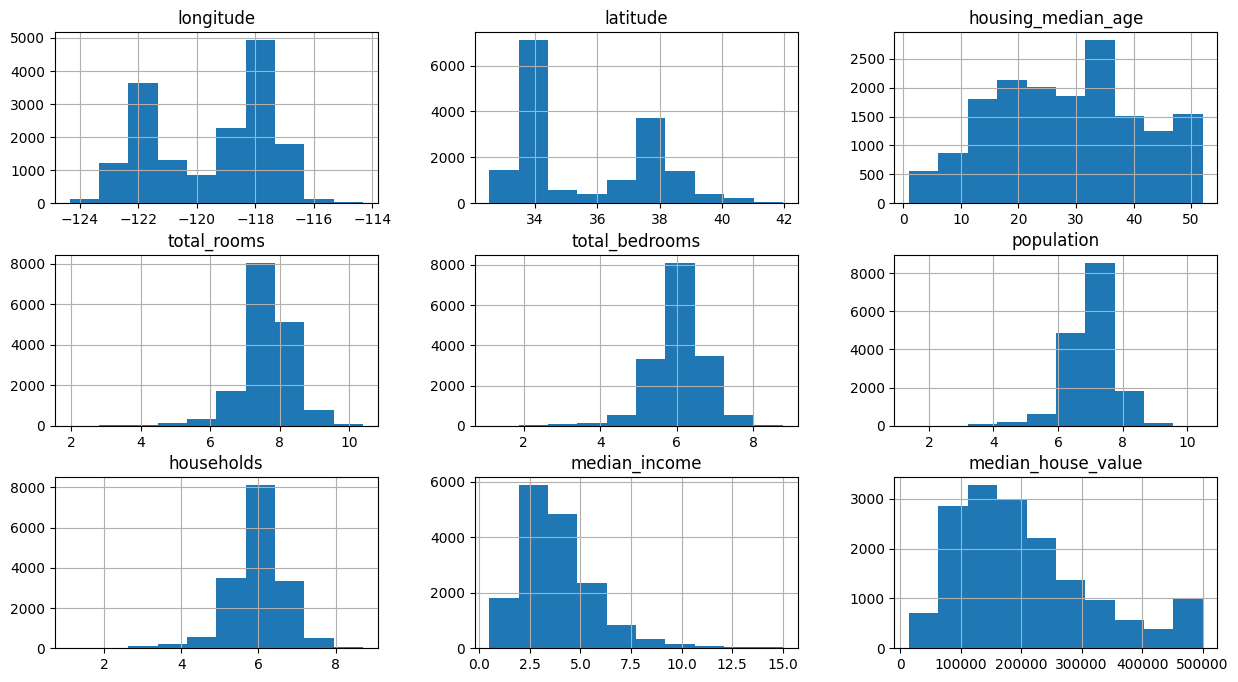

In [8]:
trained_data.hist(figsize = (15 , 8))
# this is going to print the graphs of the the given varibales.


# Here we have made the hist of the plot data

In [9]:
trained_data.columns
# here we have a coloumn called as ocean proximity which is a string value varible.

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

So we are going to take this out and instead of the values we are going to take the numbers as input

In [10]:
# here we are going to count the no of times each of the ocean promximity values was there
trained_data.ocean_proximity.value_counts()
# we have got the values of the given varibale 


ocean_proximity
<1H OCEAN     7217
INLAND        5191
NEAR OCEAN    2106
NEAR BAY      1828
ISLAND           4
Name: count, dtype: int64

In [11]:
pd.get_dummies(trained_data.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7022,1,0,0,0,0
19040,1,0,0,0,0
18098,0,0,0,1,0
10822,1,0,0,0,0
7992,0,0,0,0,1
...,...,...,...,...,...
17804,1,0,0,0,0
4056,1,0,0,0,0
12915,0,1,0,0,0
6760,1,0,0,0,0


In [12]:
trained_data.join(pd.get_dummies(trained_data.ocean_proximity).astype(int))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7022,-117.99,33.92,27.0,8.666647,7.050123,8.041413,7.043160,4.0610,<1H OCEAN,222700.0,1,0,0,0,0
19040,-122.72,38.48,23.0,7.739359,5.877736,6.805723,5.814131,6.0298,<1H OCEAN,289100.0,1,0,0,0,0
18098,-122.08,37.36,28.0,7.687997,5.652489,6.591674,5.476464,8.2266,NEAR BAY,500001.0,0,0,0,1,0
10822,-117.91,33.73,26.0,7.789040,6.240276,7.961370,6.234411,4.7639,<1H OCEAN,179900.0,1,0,0,0,0
7992,-118.20,33.82,43.0,7.472501,5.852202,6.861711,5.746203,5.2606,NEAR OCEAN,198900.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17804,-121.97,37.31,21.0,8.939712,7.681099,8.199189,7.467371,3.6401,<1H OCEAN,267500.0,1,0,0,0,0
4056,-118.42,34.16,46.0,4.007333,2.302585,3.044522,1.945910,0.5360,<1H OCEAN,375000.0,1,0,0,0,0
12915,-121.18,38.67,42.0,7.650645,6.175867,6.852243,6.056784,2.3333,INLAND,116000.0,0,1,0,0,0
6760,-118.12,34.08,49.0,7.486053,5.926926,6.918695,5.908083,3.1583,<1H OCEAN,268200.0,1,0,0,0,0


using p

# Now we are going to make the linear regreassion plot after this

In [13]:
from sklearn.linear_model import LinearRegression

X_train , y_train = trained_data.drop(['median_house_value'],axis = 1), trained_data['median_house_value']
# here we have taken the 
reg = LinearRegression()
# loading the liner regression model and library




In [14]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()

forest_model.fit(X_train , y_train)



ValueError: could not convert string to float: '<1H OCEAN'